## importing neccessray libraries

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ##split data into training and testing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



## data loading

In [3]:
data=pd.read_csv("weather_data_balanced.csv")
data

,Temperature,Humidity,Air_Pressure,Wind_Speed,Weather_Condition
0,25.07,10.01,998.89,0.44,Sunny
1,29.62,76.66,988.91,1.22,Rainy
2,7.83,69.00,952.23,36.70,Stormy
3,15.87,79.70,972.47,18.17,Cloudy
4,29.75,61.68,1039.54,29.21,Partly Cloudy
...,...,...,...,...,...
3995,36.06,21.35,1019.75,9.94,Sunny
3996,27.23,90.09,1009.58,16.43,Rainy
3997,7.79,68.34,984.11,41.80,Stormy
3998,19.44,60.29,985.72,18.37,Cloudy


In [4]:
print(data.head())

   Temperature  Humidity  Air_Pressure  Wind_Speed Weather_Condition
0        25.07     10.01        998.89        0.44             Sunny
1        29.62     76.66        988.91        1.22             Rainy
2         7.83     69.00        952.23       36.70            Stormy
3        15.87     79.70        972.47       18.17            Cloudy
4        29.75     61.68       1039.54       29.21     Partly Cloudy


## DATA preprocessing

In [5]:
# Check for missing values
print(data.isnull().sum())

Temperature          0
Humidity             0
Air_Pressure         0
Wind_Speed           0
Weather_Condition    0
dtype: int64


In [6]:
## shape of data
print(data['Weather_Condition'].value_counts())

data.shape

Weather_Condition
Sunny            800
Rainy            800
Stormy           800
Cloudy           800
Partly Cloudy    800
Name: count, dtype: int64


(4000, 5)

In [7]:
##information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        4000 non-null   float64
 1   Humidity           4000 non-null   float64
 2   Air_Pressure       4000 non-null   float64
 3   Wind_Speed         4000 non-null   float64
 4   Weather_Condition  4000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 156.4+ KB


In [8]:
##finding duplicate
data.duplicated().sum()

0

## EDA

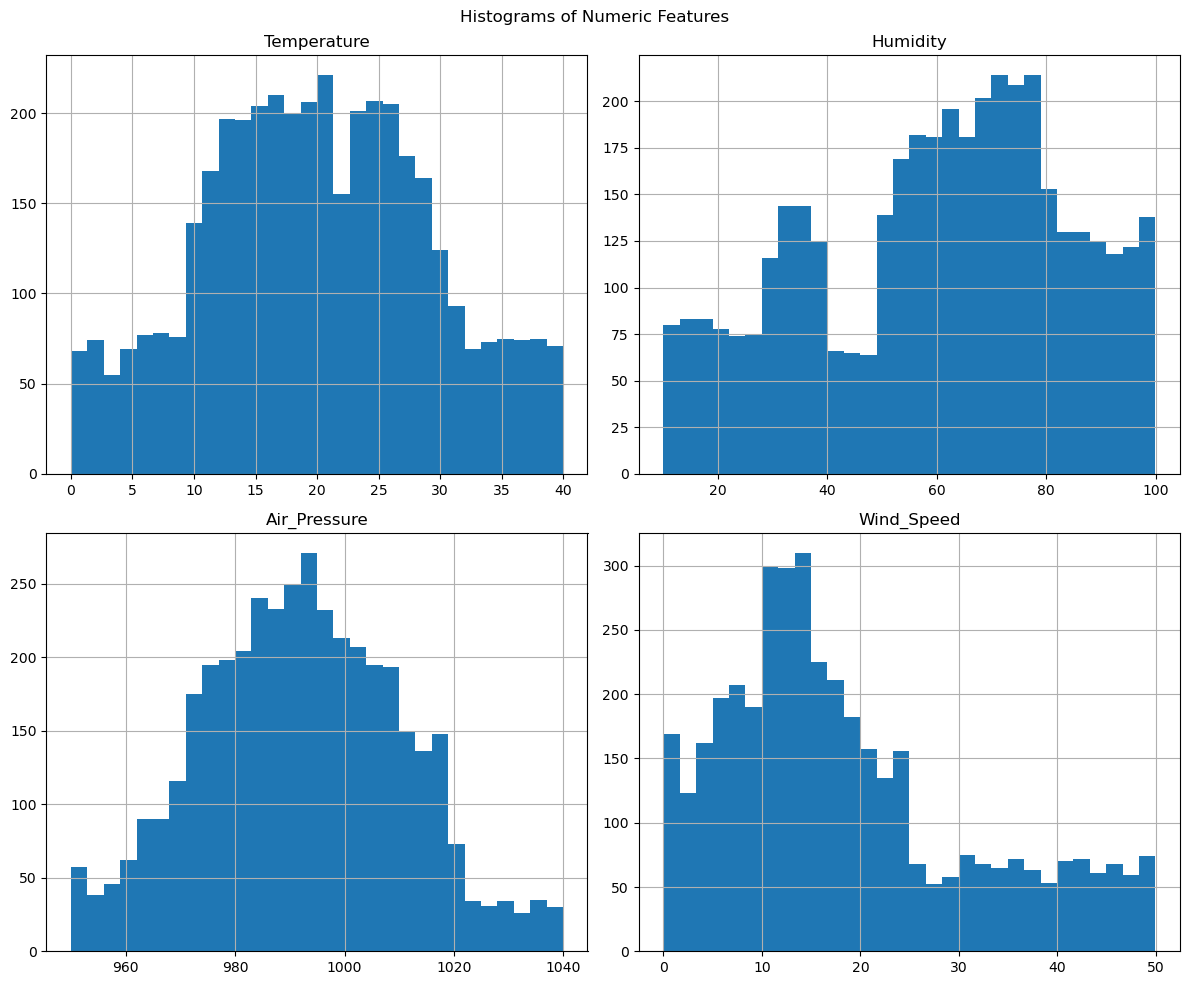

In [9]:
# Plot histogram for all numeric features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

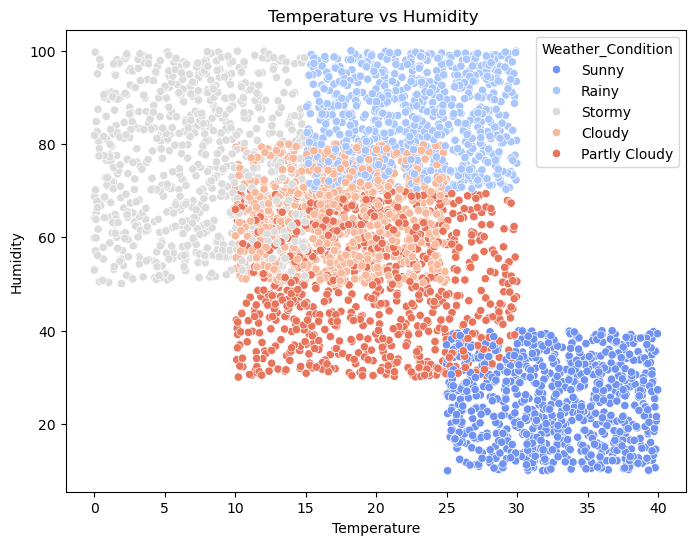

In [10]:
# Scatter plot: Temperature vs Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Temperature', y='Humidity', hue='Weather_Condition', palette='coolwarm')
plt.title('Temperature vs Humidity ')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

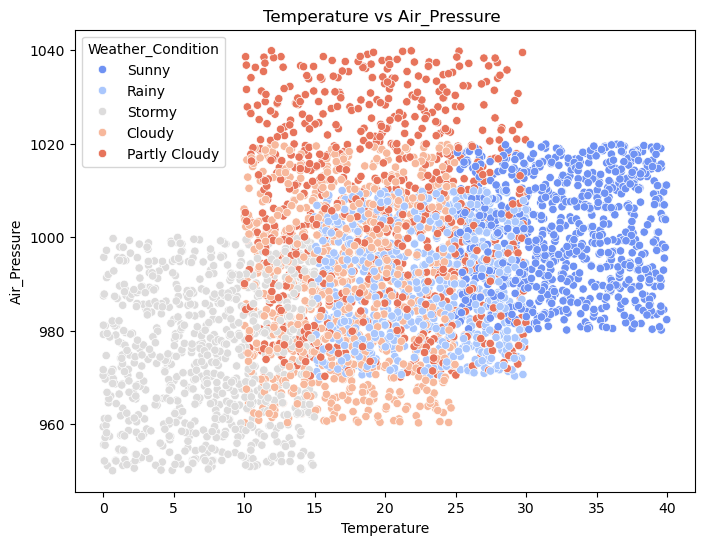

In [11]:
# Scatter plot: Temperature vs  Air_Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Temperature', y='Air_Pressure', hue='Weather_Condition', palette='coolwarm')
plt.title('Temperature vs Air_Pressure ')
plt.xlabel('Temperature')
plt.ylabel('Air_Pressure')
plt.show()

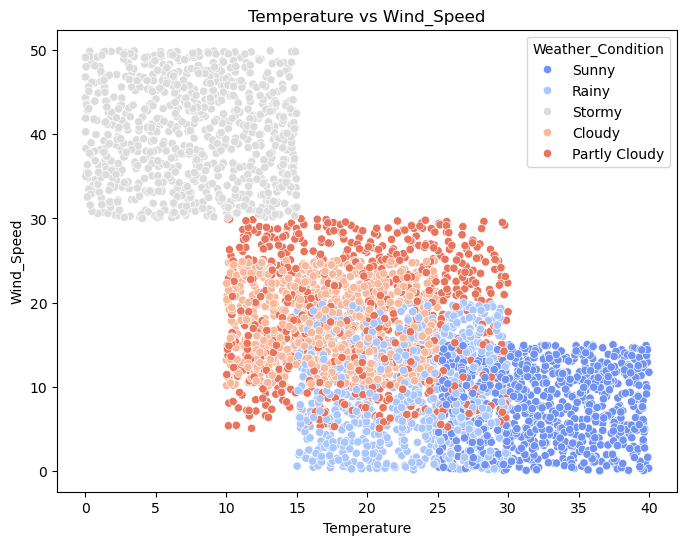

In [12]:
# Scatter plot: Temperature vs Wind_Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Temperature', y='Wind_Speed', hue='Weather_Condition', palette='coolwarm')
plt.title('Temperature vs Wind_Speed')
plt.xlabel('Temperature')
plt.ylabel('Wind_Speed')
plt.show()

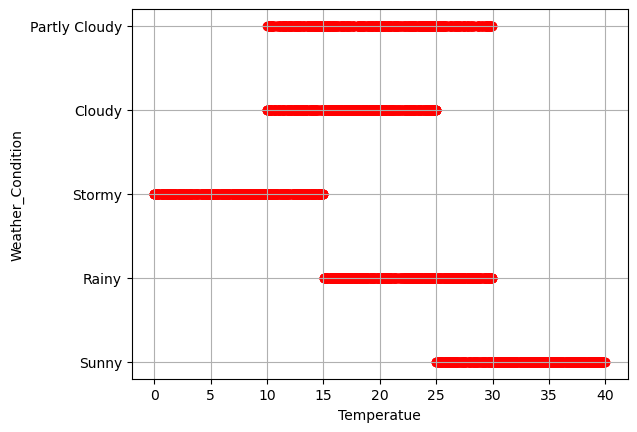

In [13]:
plt.scatter(data["Temperature"] , data["Weather_Condition"] , color= "red")
plt.xlabel("Temperatue")
plt.ylabel("Weather_Condition")
plt.grid()

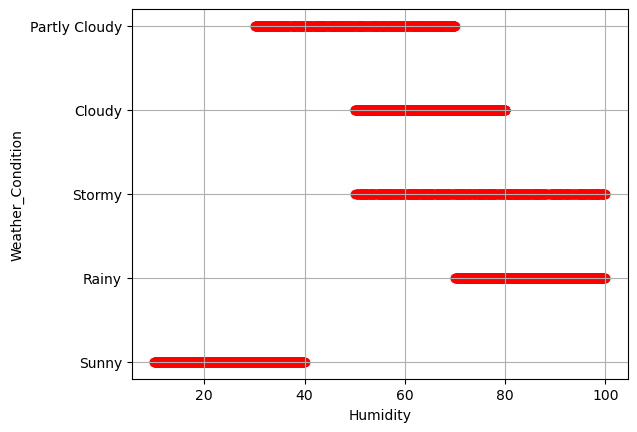

In [14]:
plt.scatter(data["Humidity"] , data["Weather_Condition"] , color= "red")
plt.xlabel("Humidity")
plt.ylabel("Weather_Condition")
plt.grid()

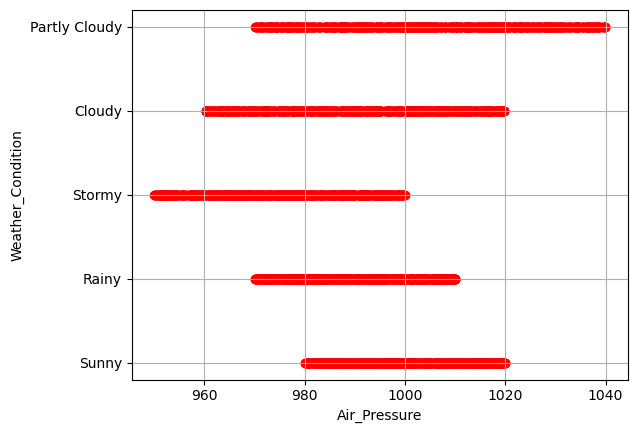

In [15]:
plt.scatter(data["Air_Pressure"] , data["Weather_Condition"] , color= "red")
plt.xlabel("Air_Pressure")
plt.ylabel("Weather_Condition")
plt.grid()

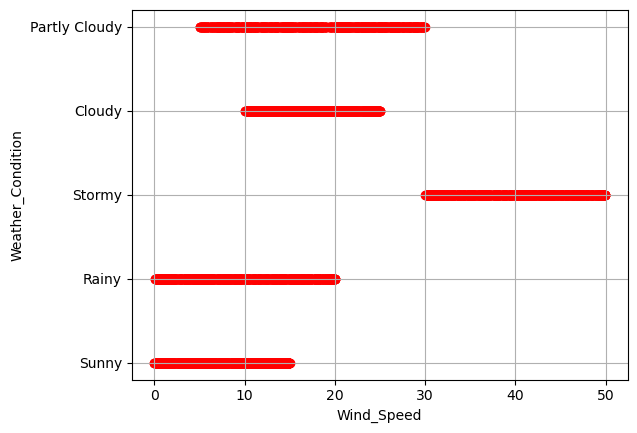

In [16]:
plt.scatter(data["Wind_Speed"] , data["Weather_Condition"] , color= "red")
plt.xlabel("Wind_Speed")
plt.ylabel("Weather_Condition")
plt.grid()

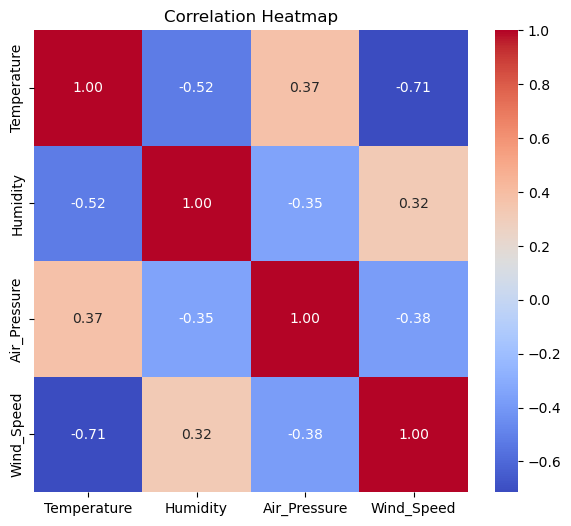

In [17]:
# Correlation matrix heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

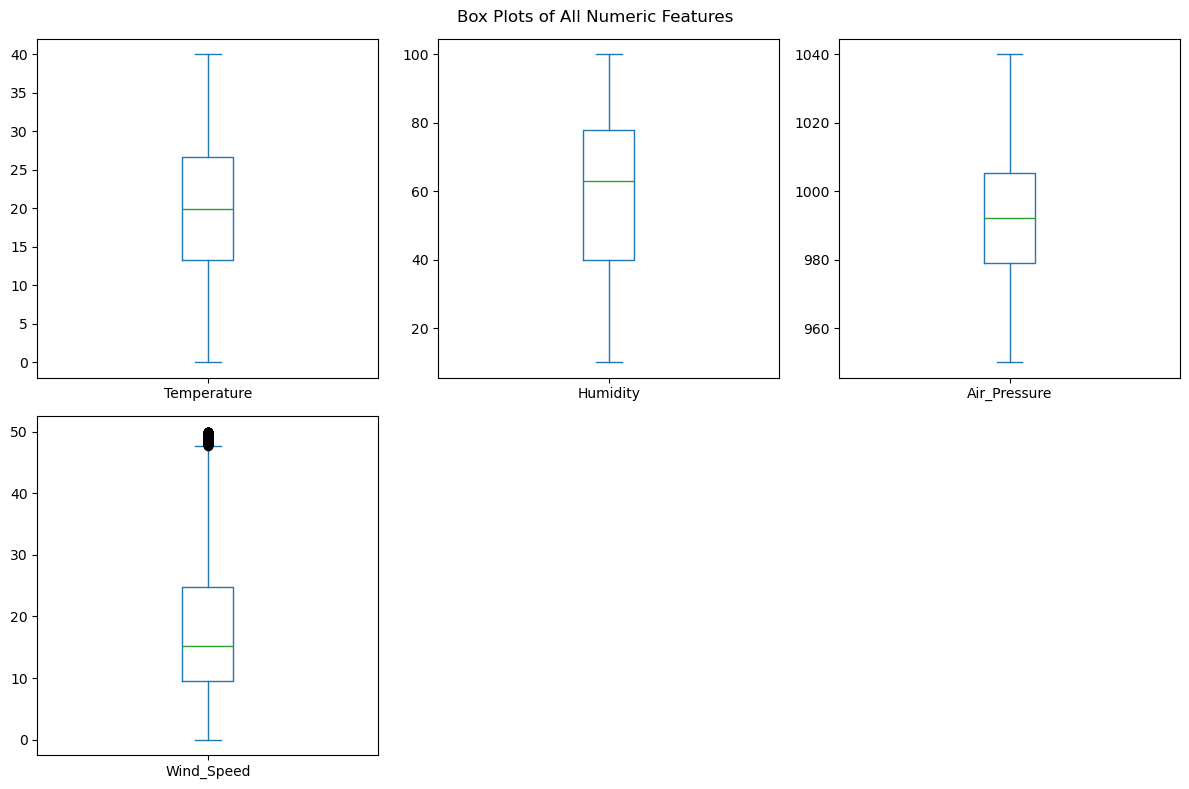

In [18]:
# Box plot for all numeric columns
data.plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.suptitle('Box Plots of All Numeric Features')
plt.tight_layout()
plt.show()

In [19]:
## outliers treatment
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [20]:
wisker(data["Wind_Speed"])

(-13.243749999999995, 47.62624999999999)

In [21]:
for i in ["Wind_Speed"]:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

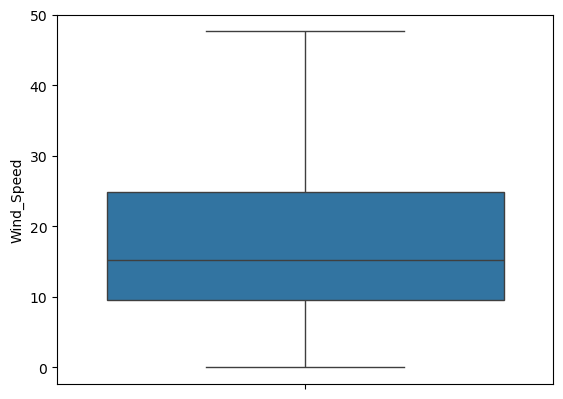

In [22]:
for i in ["Wind_Speed"]:
    sns.boxplot(data[i])
    plt.show()

In [23]:
# Encode target variable
label_encoder= LabelEncoder()
data['Weather_Condition'] = label_encoder.fit_transform(data['Weather_Condition'])

## split data in to train and test sets

In [24]:
# Split features (X) and target (y)
X = data.drop('Weather_Condition', axis=1)
y = data['Weather_Condition']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Train the model

In [25]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=15,
    max_features='sqrt',
    class_weight='balanced',  # Handle class imbalance
    random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=15, n_estimators=200, random_state=42)

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## Evalute the model

In [27]:
# make prediction 
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_train)

In [28]:
# check accuracy
# Accuracy score
print("test of Accuracy:", accuracy_score(y_test, y_pred))
print("training Accuracy:", accuracy_score(y_train, y_pred1))


test of Accuracy: 0.94
training Accuracy: 0.9596875


In [29]:
# Detailed classification report
# Detailed classification report
print(" test of Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("training Classification Report:\n")
print(classification_report(y_train, y_pred1, target_names=label_encoder.classes_))

 test of Classification Report:

               precision    recall  f1-score   support

       Cloudy       0.82      0.93      0.87       174
Partly Cloudy       0.98      0.83      0.90       155
        Rainy       0.94      0.94      0.94       160
       Stormy       1.00      1.00      1.00       168
        Sunny       0.99      1.00      1.00       143

     accuracy                           0.94       800
    macro avg       0.95      0.94      0.94       800
 weighted avg       0.94      0.94      0.94       800

training Classification Report:

               precision    recall  f1-score   support

       Cloudy       0.85      0.98      0.91       626
Partly Cloudy       1.00      0.83      0.91       645
        Rainy       0.99      0.99      0.99       640
       Stormy       1.00      1.00      1.00       632
        Sunny       0.99      1.00      0.99       657

     accuracy                           0.96      3200
    macro avg       0.96      0.96      0.96     

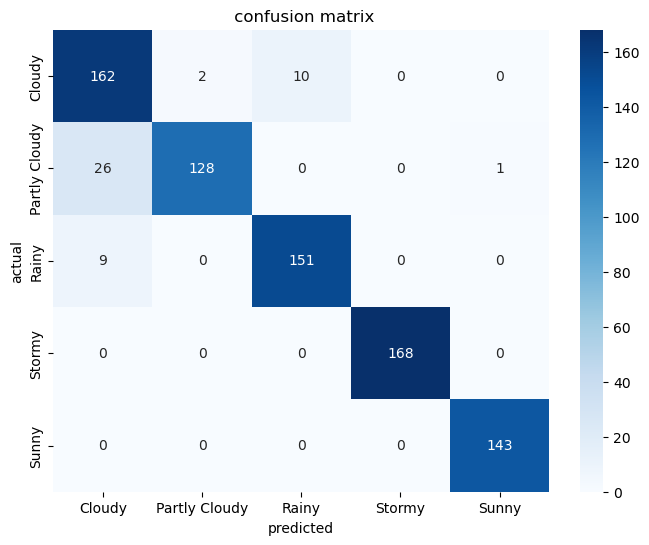

In [30]:
#confusion matrix
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)
plt.title(" confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [31]:
# predict on new weather data
new_data = pd.DataFrame([[23.5, 9.2, 1000.23, 0.232]], columns=["Temperature","Humidity","Air_Pressure","Wind_Speed"])
# Predict and decode the label
predicted_label = model.predict(new_data)
print(" predicted Weather_Condition:",label_encoder .inverse_transform(predicted_label)[0])

 predicted Weather_Condition: Partly Cloudy


In [32]:
## save model
import joblib
joblib.dump(model,"weather_model.pkl")

['weather_model.pkl']

In [36]:
import streamlit as st
import numpy as np
import joblib

# Load model
model = joblib.load('weather_model.pkl')

st.title("Weather Condition Predictor")

# Input features
temperature = st.number_input("Temperature (°C)", format="%.2f")
humidity = st.number_input("Humidity (%)", format="%.2f")
wind_speed = st.number_input("Wind Speed (km/h)", format="%.2f")
pressure = st.number_input("Pressure (hPa)", format="%.2f")

if st.button("Predict"):
    features = np.array([[temperature, humidity, wind_speed, pressure]])
    prediction = model.predict(features)
    st.success(f"Predicted Weather Condition: {prediction[0]}")

In [37]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode target labels (for example: ['Sunny', 'Rainy', 'Snowy'])
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Assuming y is your target column

# Train your model with y_encoded instead of y
model.fit(X, y_encoded)

# Save the model and encoder
joblib.dump(model, 'weather_model.pkl')
joblib.dump(label_encoder, 'weather_encoder.pkl')


['weather_encoder.pkl']

In [38]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Example target labels
y = ['Sunny', 'Rainy', 'stormy', 'cloudy', 'partly cloudy ']

# Create and fit the label encoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Optional: Save the encoder for future use (e.g., in deployment)
joblib.dump(encoder, 'label_encoder.pkl')

# To load it later:
# encoder = joblib.load('label_encoder.pkl')

print("Encoded labels:", y_encoded)
print("Classes:", encoder.classes_)


Encoded labels: [1 0 4 2 3]
Classes: ['Rainy' 'Sunny' 'cloudy' 'partly cloudy ' 'stormy']


In [39]:
import joblib
joblib.dump(label_encoder, 'weather_encoder.pkl')


['weather_encoder.pkl']